# Варіант 1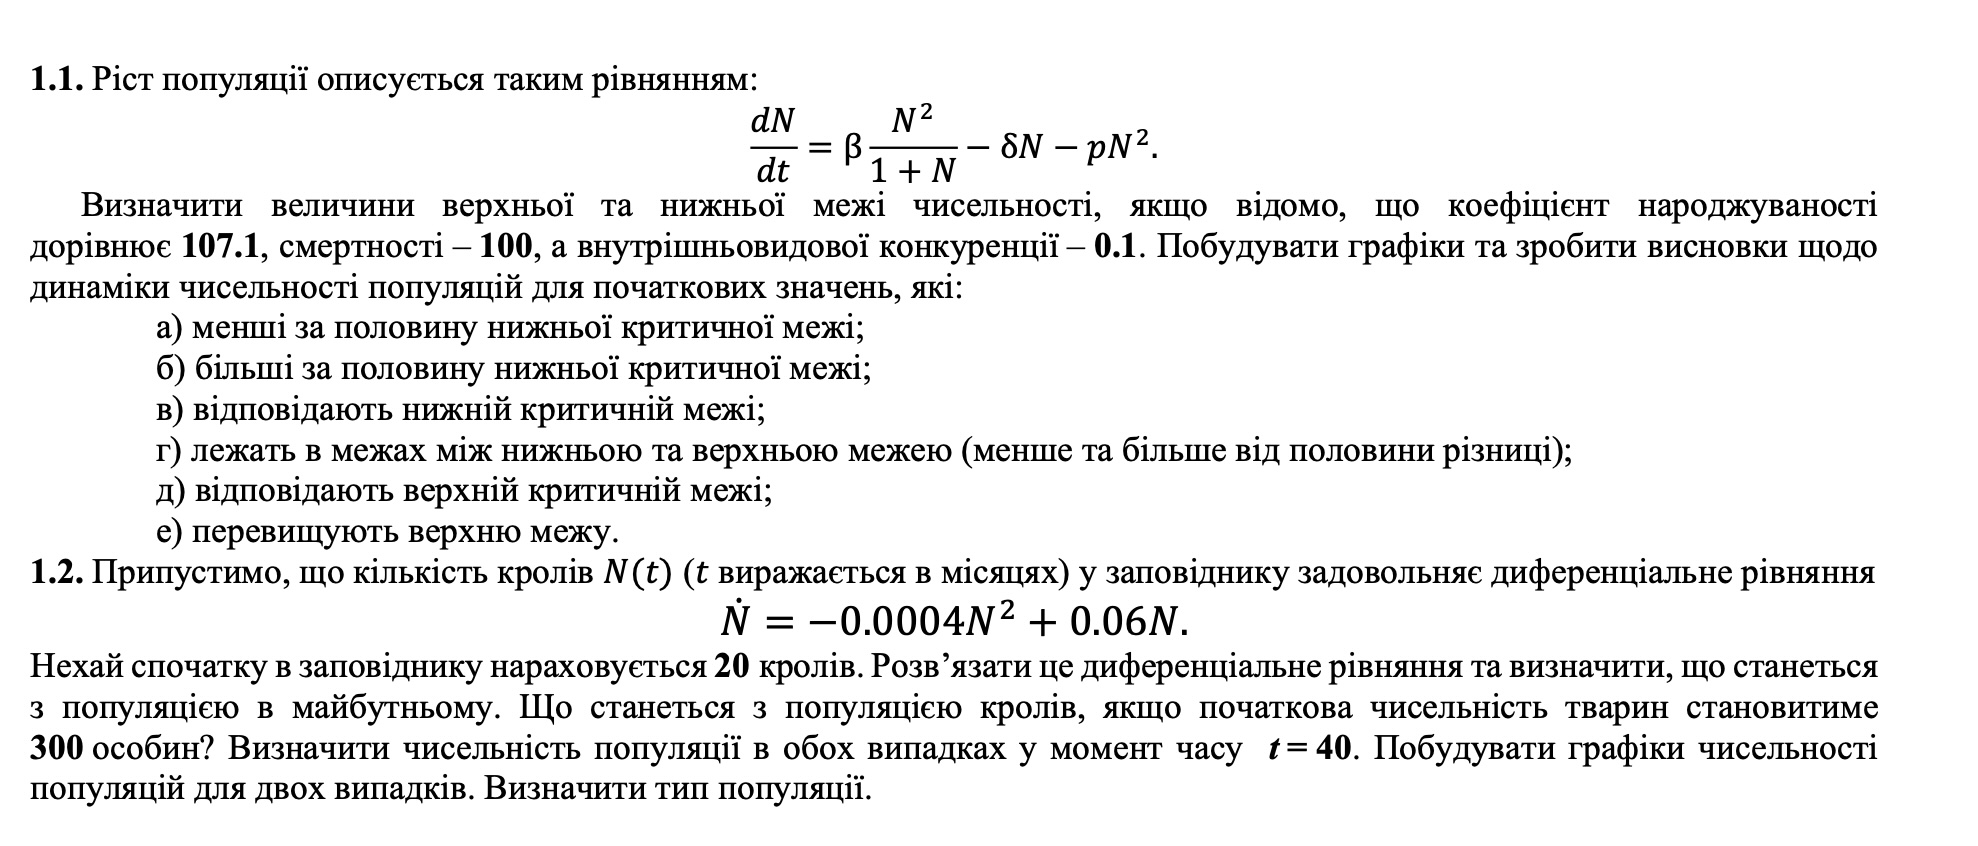

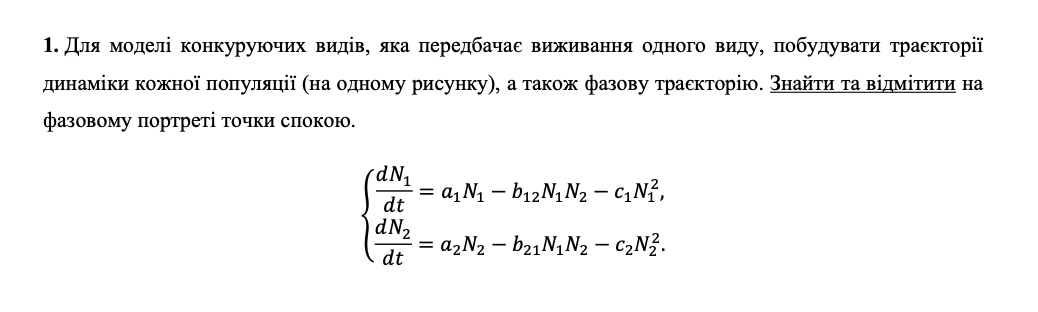

In [ ]:
import numpy as np
import sympy as sp
import plotly.express as px
from scipy.integrate import solve_ivp

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import fsolve
from scipy.misc import derivative

import warnings
warnings.filterwarnings('ignore')


## 1.1

In [ ]:
beta = 107.1
delta = 100
p = 0.1

N = sp.symbols('N')

eq = beta * N**2 / (1 + N) - delta * N - p * N ** 2
f = sp.lambdify(N, eq, "numpy")

equilibrium_points = sp.solve(eq, N)

print(equilibrium_points)

X = np.linspace(0, 80, 200)
fig = px.line(x=X, y=f(X))
fig.show()

[0.0, 20.0000000000000, 50.0000000000000]


In [ ]:
def dN_dt(t, N):
    return 107.1 * N**2 / (1 + N) - 100 * N - 0.1 * N ** 2

N0 = [0.1, 0.3, 0.4, 0.6, 0.8, 1.0, 1.5, 2]
N0 = [10, 15, 24, 55, 60, 80, 100, 150]
t_span = (0, 1)
t_eval = np.linspace(t_span[0], t_span[1], (t_span[1] - t_span[0] + 1) * 100)

sols = [solve_ivp(dN_dt, t_span, [N0_i], t_eval=t_eval, method='RK45') for N0_i in N0]

data = {
    'Time (t)': np.concatenate([s.t for s in sols]),
    'N(t)': np.concatenate([s.y[0] for s in sols]),
    'Condition': ['N0 = ' + str(N0_i) for N0_i in N0 for _ in range(len(t_eval))]
}

fig = px.line(data, x='Time (t)', y='N(t)', color='Condition',
              title='Solutions of the Differential Equation',
              labels={'Time (t)': 'Time (t)', 'N(t)': 'N(t)', 'Condition': 'Initial Condition'})

fig.show()


## 1.2

In [ ]:
def dN_dt(t, N):
    return -0.0004 * N**2 + 0.06 * N

N0_first = 20
N0_second = 300

t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], (t_span[1] - t_span[0] + 1))

sol_first = solve_ivp(dN_dt, t_span, [N0_first], t_eval=t_eval, method='RK45')

sol_second = solve_ivp(dN_dt, t_span, [N0_second], t_eval=t_eval, method='RK45')

data = {
    'Time (t)': np.concatenate((sol_first.t, sol_second.t)),
    'N(t)': np.concatenate((sol_first.y[0], sol_second.y[0])),
    'Condition': ['N0 = 20']*len(sol_first.t) + ['N0 = 300']*len(sol_second.t)
}

fig = px.line(data, x='Time (t)', y='N(t)', color='Condition',
              title='Solutions of the Differential Equation with Different Initial Conditions',
              labels={'Time (t)': 'Time (t)', 'N(t)': 'N(t)', 'Condition': 'Initial Condition'})

fig.show()
print(sol_first.y[0][40])
print(sol_second.y[0][40])

94.34898171211944
157.18949278227424


In [ ]:
N = sp.symbols('N')

eq = -0.0004 * N**2 + 0.06 * N

equilibrium_points = sp.solve(eq, N)

equilibrium_points


[0.0, 150.000000000000]

# 2



In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import plotly.express as px
import matplotlib.pyplot as plt

def model(t, y):
    N1, N2 = y
    dN1_dt = 1 * N1 - 0.2 * N1 * N2 - 0.1 * N1**2
    dN2_dt = 1 * N2 - 0.3 * N1 * N2 - 0.1 * N2**2
    return [dN1_dt, dN2_dt]

N1_initial = 10
N2_initial = 5
initial_conditions = [N1_initial, N2_initial]
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 400)

sol = solve_ivp(model, t_span, initial_conditions, t_eval=t_eval, method='RK45')

data = {
    'Time': np.concatenate((sol.t, sol.t)),
    'Population': np.concatenate((sol.y[0], sol.y[1])),
    'Species': ['Species 1']*len(sol.t) + ['Species 2']*len(sol.t)
}

df = pd.DataFrame(data)

fig = px.line(df, x='Time', y='Population', color='Species',
              title='Neutral Population Dynamics of Two Species',
              labels={'Population': 'Population Size', 'Time': 'Time'},
              line_shape='spline')

fig.show()


In [ ]:
N1, N2 = sp.symbols('N1 N2')

eq1 = 1 - 0.2 * N2 - 0.1 * N1
eq2 = 1 - 0.3 * N1 - 0.1 * N2

equilibrium_points = sp.solve([eq1, eq2], (N1, N2))
equilibrium_points

{N1: 2.00000000000000, N2: 4.00000000000000}

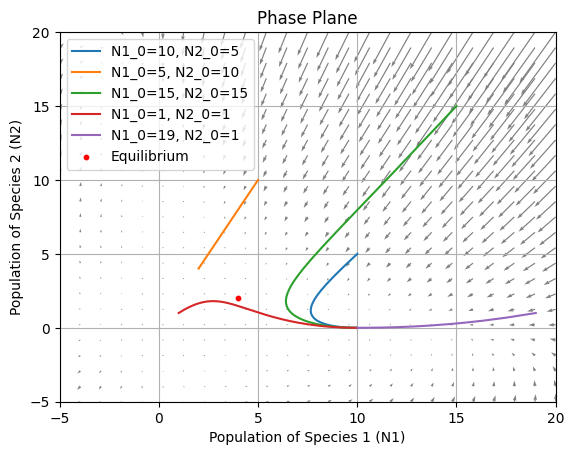

In [ ]:

x_values = np.linspace(-5, 20, 25)
y_values = np.linspace(-5, 20, 25)
X, Y = np.meshgrid(x_values, y_values)

U, V = np.zeros(X.shape), np.zeros(Y.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        rate = model(0, [X[i, j], Y[i, j]])
        U[i, j] = rate[0]
        V[i, j] = rate[1]

plt.quiver(X, Y, U, V, color='gray')

initial_conditions = [
    (10, 5), (5, 10), (15, 15), (1, 1), (19, 1)
]
t_span = (-5, 20)
t_eval = np.linspace(t_span[0], t_span[1], 300)

for ic in initial_conditions:
    sol = solve_ivp(model, t_span, ic, t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'N1_0={ic[0]}, N2_0={ic[1]}')

plt.scatter([4], [2], color='red', s=10, zorder=5, label='Equilibrium')

plt.title('Phase Plane')
plt.xlabel('Population of Species 1 (N1)')
plt.ylabel('Population of Species 2 (N2)')
plt.legend()
plt.grid(True)
plt.xlim([-5, 20])
plt.ylim([-5, 20])
plt.show()


In [ ]:
N1, N2 = sp.symbols('N1 N2')

dN1_dt = N1 - 0.1 * N1 * N2 - 0.2 * N1**2
dN2_dt = N2 - 0.1 * N1 * N2 - 0.3 * N2**2

f = sp.Matrix([dN1_dt, dN2_dt])

variables = sp.Matrix([N1, N2])

Jacobian = f.jacobian(variables)

print("Jacobian Matrix:")
sp.pprint(Jacobian)

N1_val, N2_val = 2, 4
Jacobian_evaluated = Jacobian.subs({N1: N1_val, N2: N2_val})

print("Jacobian evaluated at (N1=8, N2=6):")
sp.pprint(Jacobian_evaluated)


Jacobian Matrix:
⎡-0.4⋅N₁ - 0.1⋅N₂ + 1        -0.1⋅N₁       ⎤
⎢                                          ⎥
⎣      -0.1⋅N₂         -0.1⋅N₁ - 0.6⋅N₂ + 1⎦
Jacobian evaluated at (N1=8, N2=6):
⎡-0.2  -0.2⎤
⎢          ⎥
⎣-0.4  -1.6⎦


In [ ]:
import numpy as np

J = np.array([[-1.6, 0.8], [0.6, -1.8]])
eigenvalues = np.linalg.eigvals(J)
print(f"Стійкий вузол: {eigenvalues}")



Стійкий вузол: [-1.  -2.4]
